In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('/Users/adriangarcia/Desktop/Project_ML_Adri/data/processed/merged_20_years.csv')  

In [7]:
df

,SP.DYN.LE00.IN,NY.GDP.MKTP.KD,SP.POP.TOTL,AG.SRF.TOTL.K2
0,74.560000,2.702866e+09,99212.0,1.800000e+02
1,57.620852,7.526102e+11,509410477.0,1.514274e+07
2,60.364000,1.403249e+10,27385307.0,6.528600e+05
3,54.159421,5.632071e+11,346475221.0,9.166270e+06
4,55.752000,6.669735e+10,22507674.0,1.246700e+06
...,...,...,...,...
5048,71.696000,6.585353e+08,188073.0,2.840000e+03
5050,65.006000,4.829494e+10,20733406.0,5.279700e+05
5051,54.043000,2.541360e+11,48556071.0,1.219090e+06
5052,49.487000,1.015308e+10,11188040.0,7.526100e+05


In [4]:
df = df[['SP.DYN.LE00.IN','NY.GDP.MKTP.KD','SP.POP.TOTL','AG.SRF.TOTL.K2']]
df = df.dropna()

In [22]:
df['SP.DYN.LE00.IN'].median()

71.78999999999999

In [5]:
X = df[['NY.GDP.MKTP.KD','SP.POP.TOTL','AG.SRF.TOTL.K2']]
y = df['SP.DYN.LE00.IN']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [10]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (4560, 3)
Train features shape: (3192, 3)
Train target shape: (3192,)
Test features shape: (1368, 3)
Test target shape: (1368,)


LINEAR REGRESSION, DECISION TREE Y RANDOM FOREST

In [11]:
# Train and evaluate different models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print the model's performance metrics
    print(f"{name}:")
    print(f"  Mean Squared Error: {mse:.5f}")
    print(f"  Root Mean Squared Error: {rmse:.2f}")
    print(f"  R-squared: {r2:.2f}")

Linear Regression:
  Mean Squared Error: 66.86136
  Root Mean Squared Error: 8.18
  R-squared: 0.09
Decision Tree:
  Mean Squared Error: 3.23393
  Root Mean Squared Error: 1.80
  R-squared: 0.96
Random Forest:
  Mean Squared Error: 1.51757
  Root Mean Squared Error: 1.23
  R-squared: 0.98


ADABOOST, GRADIENT BOOSTING Y XGBOOST

In [12]:
# Train and evaluate different models
models = {
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print the model's performance metrics
    print(f"{name}:")
    print(f"  Mean Squared Error: {mse:.5f}")
    print(f"  Root Mean Squared Error: {rmse:.2f}")
    print(f"  R-squared: {r2:.2f}")

AdaBoost:
  Mean Squared Error: 23.45422
  Root Mean Squared Error: 4.84
  R-squared: 0.68
Gradient Boosting:
  Mean Squared Error: 9.56071
  Root Mean Squared Error: 3.09
  R-squared: 0.87
XGBoost:
  Mean Squared Error: 1.90454
  Root Mean Squared Error: 1.38
  R-squared: 0.97


XGBoost convirtiendo la variable dependiente a logaritmica

XGBoost:
  Mean Squared Error: 0.00046
  Root Mean Squared Error: 0.02
  R-squared: 0.97
MSE en la escala original: 1.8034610075492776


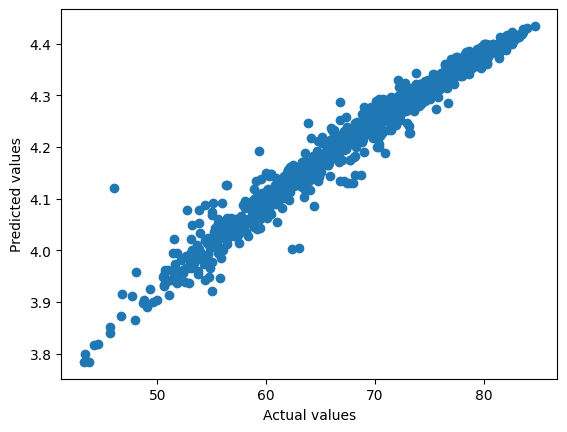

In [13]:
y_true = y_test
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

# Train XGBoost
models = {"XGBoost": XGBRegressor()}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train_log)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    mse = mean_squared_error(y_test_log, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_log, y_pred)

    # Print the model's performance metrics
    print(f"{name}:")
    print(f"  Mean Squared Error: {mse:.5f}")
    print(f"  Root Mean Squared Error: {rmse:.2f}")
    print(f"  R-squared: {r2:.2f}")

# Aplicar la transformación inversa del logaritmo a las predicciones
y_pred_orig = np.exp(y_pred)

# Calcular el error cuadrático en la escala original
mse_orig = np.mean((y_pred_orig - y_true) ** 2)

# Verificar el valor del MSE en la escala original
print("MSE en la escala original:", mse_orig)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

Modelos de regresión lineal regularizados usando los métodos de regularización: ElasticNet, Ridge, Lasso y Bayesian Ridge

In [14]:
from sklearn.linear_model import ElasticNet, Ridge, Lasso, BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score

# Train and evaluate different models
models = {
    "ElasticNet": ElasticNet(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Bayesian Ridge": BayesianRidge()
}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print the model's performance metrics
    print(f"{name}:")
    print(f"  Mean Squared Error: {mse:.5f}")
    print(f"  Root Mean Squared Error: {rmse:.2f}")
    print(f"  R-squared: {r2:.2f}")

ElasticNet:
  Mean Squared Error: 66.86136
  Root Mean Squared Error: 8.18
  R-squared: 0.09
Ridge:
  Mean Squared Error: 66.86136
  Root Mean Squared Error: 8.18
  R-squared: 0.09
Lasso:
  Mean Squared Error: 66.86136
  Root Mean Squared Error: 8.18
  R-squared: 0.09
Bayesian Ridge:
  Mean Squared Error: 66.86136
  Root Mean Squared Error: 8.18
  R-squared: 0.09


/Users/adriangarcia/anaconda3/envs/deep_learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.136e+02, tolerance: 2.400e+01
  model = cd_fast.enet_coordinate_descent(
/Users/adriangarcia/anaconda3/envs/deep_learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.047e+01, tolerance: 2.400e+01
  model = cd_fast.enet_coordinate_descent(


Búsqueda de hiperparámetros usando los modelos ElasticNet, Ridge, Lasso y Bayesian Ridge

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score
from math import sqrt

# Define the hyperparameter grids to search over
en_param_grid = {"alpha": [0.01, 0.1, 1.0],
                 "l1_ratio": [0.25, 0.5, 0.75]}
ridge_param_grid = {"alpha": [0.01, 0.1, 1.0]}
lasso_param_grid = {"alpha": [0.01, 0.1, 1.0]}
br_param_grid = {"alpha_1": [1e-6, 1e-5, 1e-4],
                 "alpha_2": [1e-6, 1e-5, 1e-4],
                 "lambda_1": [1e-6, 1e-5, 1e-4],
                 "lambda_2": [1e-6, 1e-5, 1e-4]}

# Create a dictionary of the models and their corresponding hyperparameter grids
models = {
    "ElasticNet": (ElasticNet(), en_param_grid),
    "Ridge": (Ridge(), ridge_param_grid),
    "Lasso": (Lasso(), lasso_param_grid),
    "Bayesian Ridge": (BayesianRidge(), br_param_grid)
}

# Perform hyperparameter tuning for each model using GridSearchCV
for name, (model, param_grid) in models.items():
    # Create a GridSearchCV object
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring="neg_mean_squared_error")

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters and corresponding score for the model
    print(f"{name}:")
    print(f"  Best Hyperparameters: {grid_search.best_params_}")
    print(f"  Best Score: {-grid_search.best_score_:.5f}")

    # Make predictions on the test set
    y_pred = grid_search.predict(X_test)

    # Calculate the MSE, RMSE and R^2 score
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"  MSE: {mse:.5f}")
    print(f"  RMSE: {rmse:.5f}")
    print(f"  R^2 Score: {r2:.5f}")


/Users/adriangarcia/anaconda3/envs/deep_learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.271e+04, tolerance: 1.904e+01
  model = cd_fast.enet_coordinate_descent(
/Users/adriangarcia/anaconda3/envs/deep_learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.953e+04, tolerance: 1.946e+01
  model = cd_fast.enet_coordinate_descent(
/Users/adriangarcia/anaconda3/envs/deep_learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, c

ElasticNet:
  Best Hyperparameters: {'alpha': 1.0, 'l1_ratio': 0.75}
  Best Score: 69.72101
  MSE: 66.86136
  RMSE: 8.17688
  R^2 Score: 0.08503
Ridge:
  Best Hyperparameters: {'alpha': 0.01}
  Best Score: 69.72101
  MSE: 66.86136
  RMSE: 8.17688
  R^2 Score: 0.08503
Lasso:
  Best Hyperparameters: {'alpha': 1.0}
  Best Score: 69.72101
  MSE: 66.86136
  RMSE: 8.17688
  R^2 Score: 0.08503


/Users/adriangarcia/anaconda3/envs/deep_learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.047e+01, tolerance: 2.400e+01
  model = cd_fast.enet_coordinate_descent(


Bayesian Ridge:
  Best Hyperparameters: {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 1e-06}
  Best Score: 69.72101
  MSE: 66.86136
  RMSE: 8.17688
  R^2 Score: 0.08503


PIPELINE: normalización de los datos con StandardScaler y la búsqueda de hiperparámetros del modelo KernelRidge usando GridSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge

# Definir el pipeline
model = make_pipeline(StandardScaler(), 
                      GridSearchCV(KernelRidge(), 
                                   param_grid={'alpha': [0.1, 1, 10], 
                                               'kernel': ['linear', 'rbf', 'poly']}, 
                                   cv=5))

# Entrenar el modelo
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")
print(f"R-squared: {r2:.5f}")

Mean Squared Error: 47.29783
Root Mean Squared Error: 6.87734
R-squared: 0.35275


/var/folders/6_/c1yy797x7w7g6g9sl3c4rqmw0000gn/T/ipykernel_17482/827928662.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SP.DYN.LE00.IN'], label='Life Expectancy', color='green', shade=True)


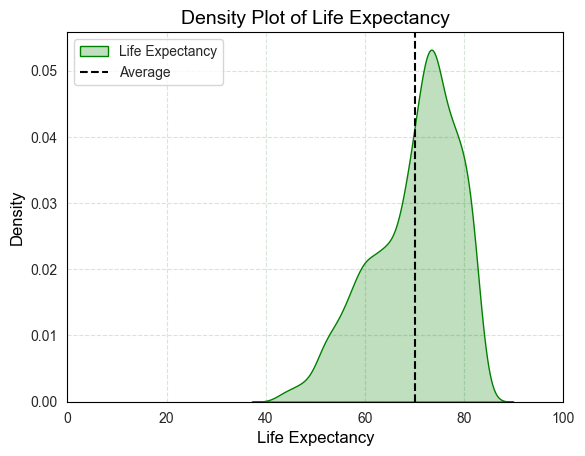

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plot
sns.set_style("whitegrid")

# Plot the density of the 'SP.DYN.LE00.IN' column
sns.kdeplot(df['SP.DYN.LE00.IN'], label='Life Expectancy', color='green', shade=True)

# Set the x-axis range from 0 to 100
plt.xlim(0, 100)

# Add vertical dashed line for the average at x=70
plt.axvline(x=70, color='black', linestyle='--',label='Average')

# Set the x-axis and y-axis labels and title of the plot
plt.xlabel("Life Expectancy", fontsize=12, color='black')
plt.ylabel("Density", fontsize=12, color='black')
plt.title("Density Plot of Life Expectancy", fontsize=14, color='black')

# Set the plot background color and gridlines
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(color='#D5E5D7', linestyle='--')

# Set the plot borders to black
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')

# Add legend to the plot
plt.legend()

# Display the plot
plt.show()


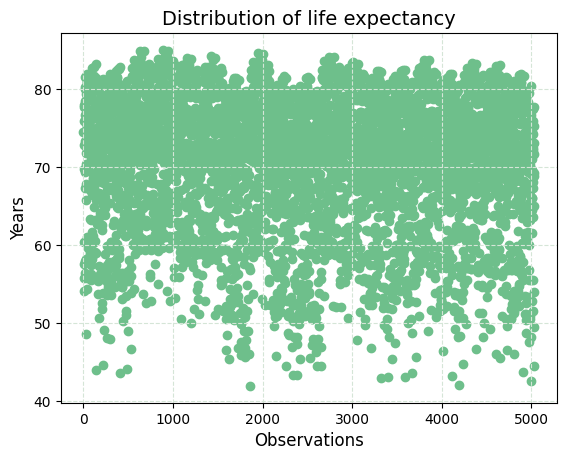

In [3]:
import matplotlib.pyplot as plt

# Create a scatter plot of the NY.GDP.MKTP.KD column
plt.scatter(range(len(df)), df['SP.DYN.LE00.IN'], color='#6EBF8B')

# Set the x-axis label and title of the plot
plt.xlabel('Observations', fontsize=12, color='black')
plt.ylabel('Years', fontsize=12, color='black')
plt.title('Distribution of life expectancy', fontsize=14, color='black')

# Set the plot background color and gridlines
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(color='#D5E5D7', linestyle='--')

# Display the plot
plt.show()


## MODELO FINAL: RANDOM FOREST

In [7]:
models = {"Random Forest": RandomForestRegressor()}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print the model's performance metrics
    print(f"{name}:")
    print(f"  Mean Squared Error: {mse:.5f}")
    print(f"  Root Mean Squared Error: {rmse:.2f}")
    print(f"  R-squared: {r2:.2f}")

Random Forest:
  Mean Squared Error: 1.49149
  Root Mean Squared Error: 1.22
  R-squared: 0.98


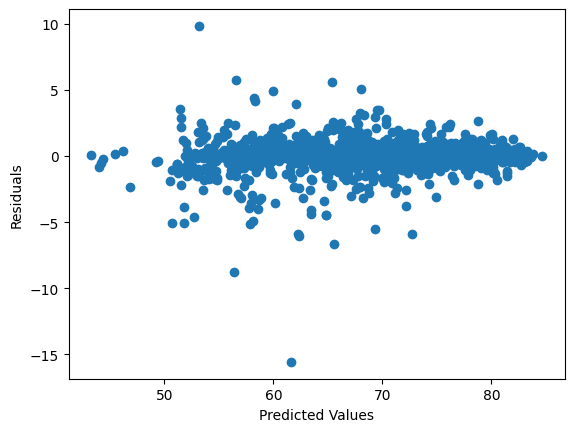

In [21]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the residuals
residuals = y_test - y_pred

# Create a scatter plot of residuals versus predicted values
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

/var/folders/6_/c1yy797x7w7g6g9sl3c4rqmw0000gn/T/ipykernel_17482/2667716297.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, label='Residuals', color='green', shade=True)


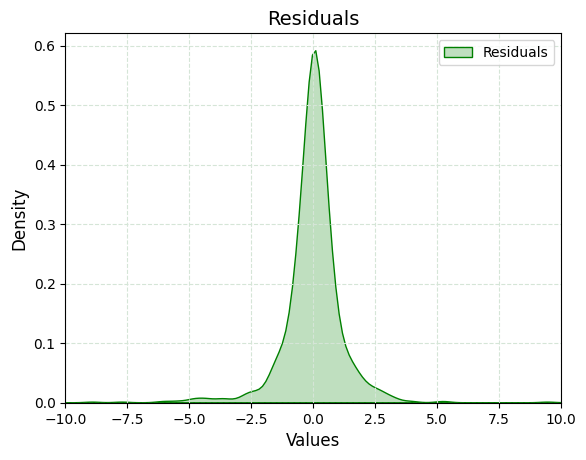

In [14]:
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the residuals
residuals = y_test - y_pred

sns.kdeplot(residuals, label='Residuals', color='green', shade=True)

# Set the x-axis label and title of the plot
plt.xlabel("Values", fontsize=12, color='black')
plt.ylabel("Density", fontsize=12, color='black')
plt.title("Residuals", fontsize=14, color='black')

# Set the plot background color and gridlines
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(color='#D5E5D7', linestyle='--')

# Add legend to the plot
plt.legend()

plt.xlim(-10, 10)

# Display the plot
plt.show()


### TESTS DE VALIDACIÓN DEL MODELO

In [30]:
from statsmodels.api import add_constant
from statsmodels.stats.diagnostic import het_breuschpagan

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the residuals
residuals = y_test - y_pred

# Add a constant column to X_test
X_test_with_const = add_constant(X_test)

# Calculate the test statistic and p-value for the Breusch-Pagan test
test_stat, p_value, _, _ = het_breuschpagan(residuals, X_test_with_const)

# Print the test statistic and p-value
print("Breusch-Pagan test for homoscedasticity:")
print(f"  Test Statistic: {test_stat:.3f}")
print(f"  p-value: {p_value:.3f}")

# Interpret the test results
if p_value < 0.05:
    print("The residuals are not homoscedastic.")
else:
    print("The residuals are homoscedastic.")



Breusch-Pagan test for homoscedasticity:
  Test Statistic: 4.094
  p-value: 0.252
The residuals are homoscedastic.


In [26]:
from scipy.stats import shapiro

# Calculate the residuals
residuals = y_test - y_pred

# Perform the Shapiro-Wilk test for normality
stat, p = shapiro(residuals)

# Print the test statistic and p-value
print("Shapiro-Wilk test for normality:")
print(f"  Test Statistic: {stat:.3f}")
print(f"  p-value: {p:.5f}")

# Interpret the test results
if p < 0.005:
    print("The residuals are not normally distributed.")
else:
    print("The residuals are normally distributed.")

Shapiro-Wilk test for normality:
  Test Statistic: 0.792
  p-value: 0.00000
The residuals are not normally distributed.


In [27]:
from scipy.stats import kstest

# Calculate the residuals
residuals = y_test - y_pred

# Perform the K-S test for normality
stat, p = kstest(residuals, "norm")

# Print the test statistic and p-value
print("Kolmogorov-Smirnov test for normality:")
print(f"  Test Statistic: {stat:.3f}")
print(f"  p-value: {p:.3f}")

# Interpret the test results
if p < 0.05:
    print("The residuals are not normally distributed.")
else:
    print("The residuals are normally distributed.")


Kolmogorov-Smirnov test for normality:
  Test Statistic: 0.107
  p-value: 0.000
The residuals are not normally distributed.


In [31]:
from statsmodels.stats.stattools import durbin_watson

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the residuals
residuals = y_test - y_pred

# Calculate the Durbin-Watson statistic
durbin_watson_statistic = durbin_watson(residuals)

# Print the Durbin-Watson statistic
print("Durbin-Watson statistic:")
print(f"  {durbin_watson_statistic:.3f}")

# Interpret the Durbin-Watson statistic
if durbin_watson_statistic < 1.5:
    print("There may be positive autocorrelation in the residuals.")
elif durbin_watson_statistic > 2.5:
    print("There may be negative autocorrelation in the residuals.")
else:
    print("There is no significant autocorrelation in the residuals.")


Durbin-Watson statistic:
  1.954
There is no significant autocorrelation in the residuals.


In [32]:
from statsmodels.tsa.stattools import adfuller

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the residuals
residuals = y_test - y_pred

# Apply the Dickey-Fuller test to the residuals
adf_test = adfuller(residuals)

# Print the test statistic and p-value
print("Dickey-Fuller test:")
print(f"  Test statistic: {adf_test[0]:.3f}")
print(f"  p-value: {adf_test[1]:.3f}")

# Interpret the test result
if adf_test[1] < 0.05:
    print("Reject the null hypothesis. The residuals do not have a unit root.")
else:
    print("Fail to reject the null hypothesis. The residuals may have a unit root.")


Dickey-Fuller test:
  Test statistic: -20.018
  p-value: 0.000
Reject the null hypothesis. The residuals do not have a unit root.
